In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Colleges

In [432]:
csv_link = "https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/College.csv"
colleges_pd = pd.read_csv(csv_link)

colleges_pd = colleges_pd.drop('Private', 1)
colleges = colleges_pd.values

In [433]:
pca = PCA()
projected = pca.fit_transform(colleges)


### Plotting Principal Component 1

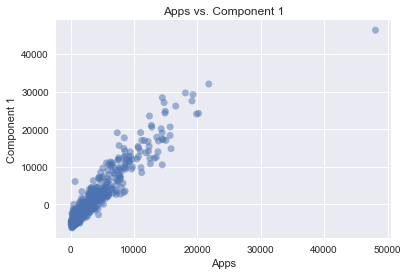

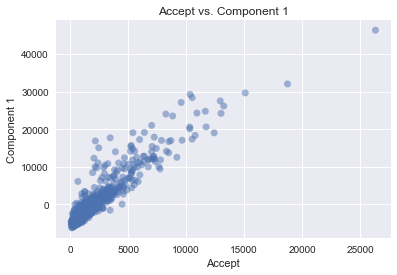

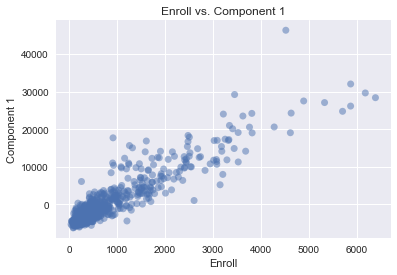

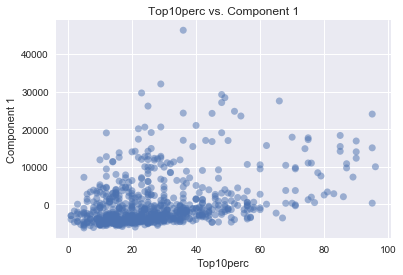

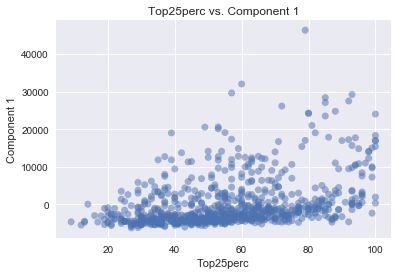

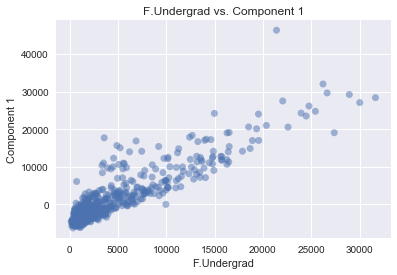

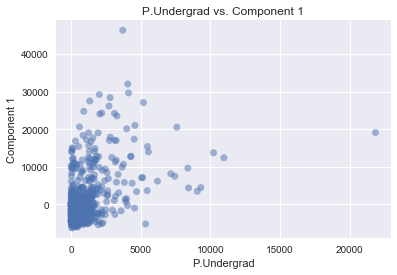

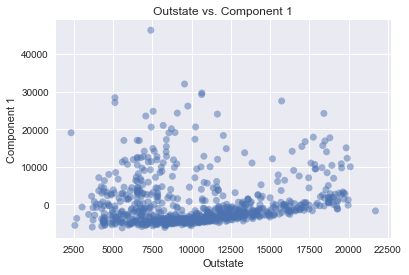

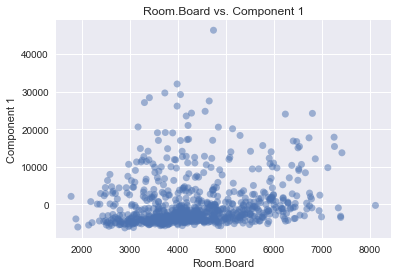

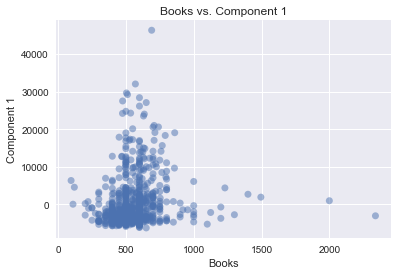

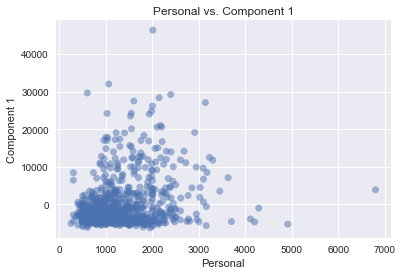

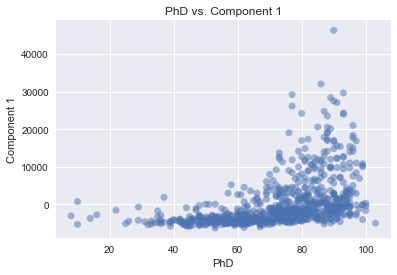

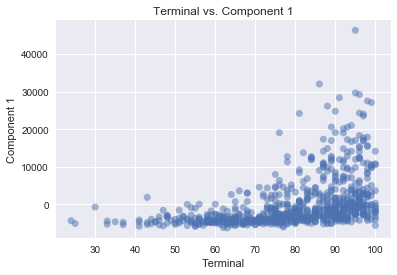

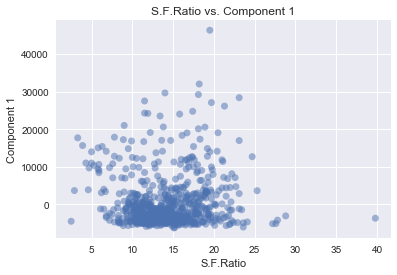

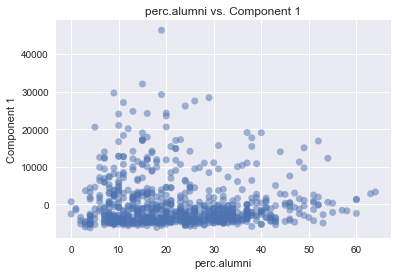

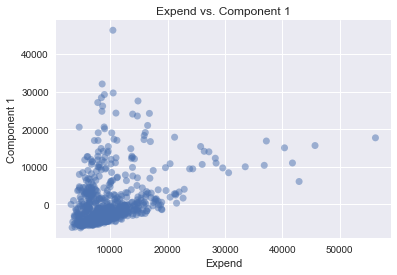

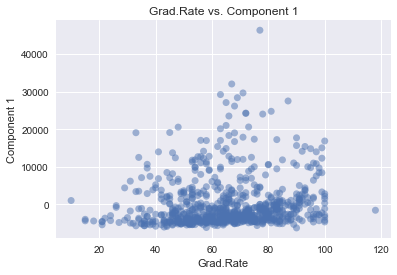

In [435]:

for i in range(colleges.shape[1]):
    plt.figure()
    plt.scatter(y = projected[:, 0], x = colleges[:,i], \
            edgecolor='none', alpha=0.5) #cmap=plt.cm.get_cmap('nipy_spectral', 5 ))
    plt.xlabel(colleges_pd.columns[i])
    plt.ylabel('Component 1')
    plt.title(colleges_pd.columns[i] + ' vs. Component 1')
    
# Code borrowed from the Python Data Science Handbook

### Plotting Principal Component 2

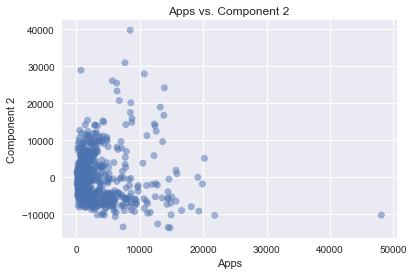

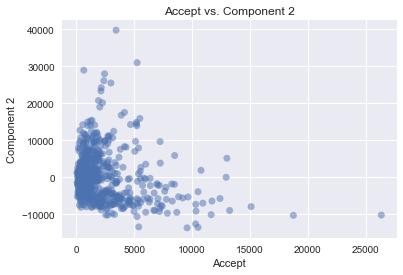

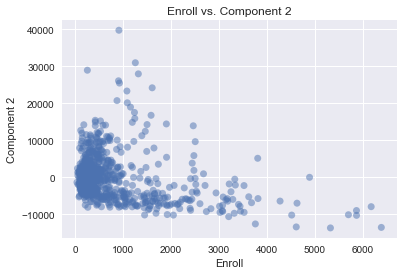

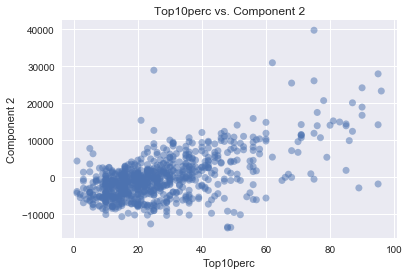

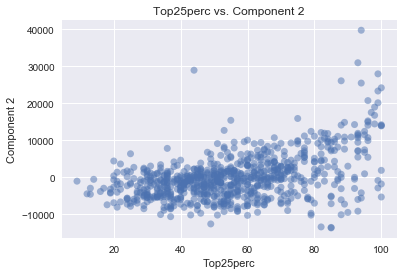

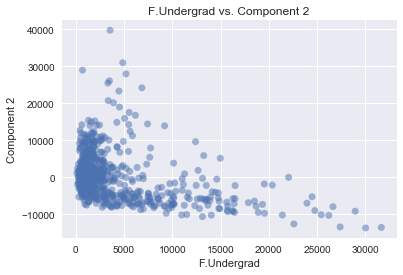

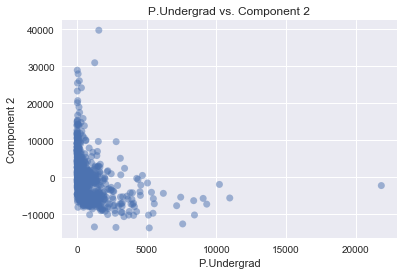

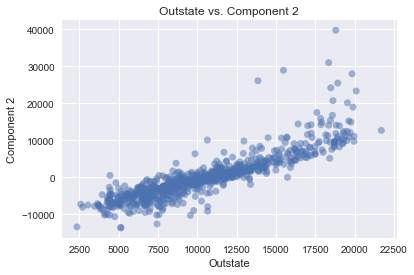

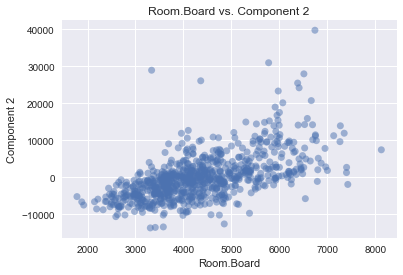

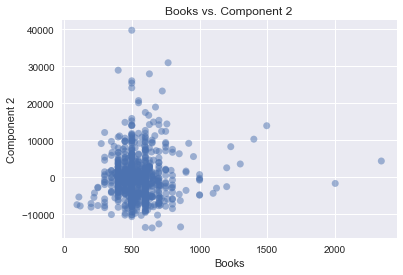

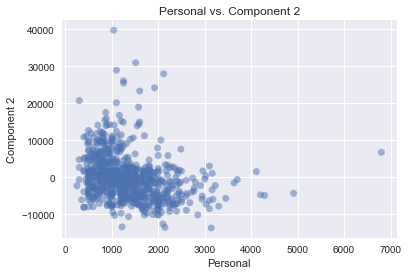

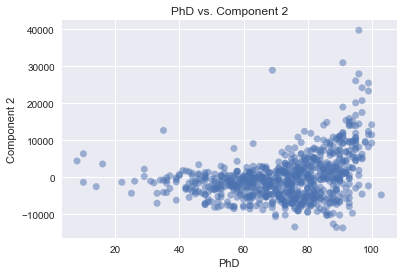

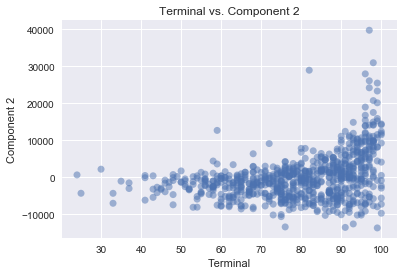

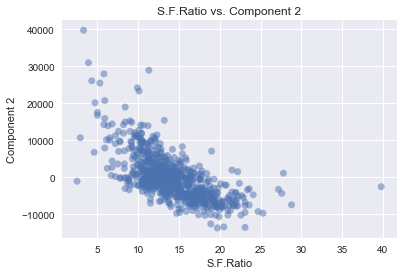

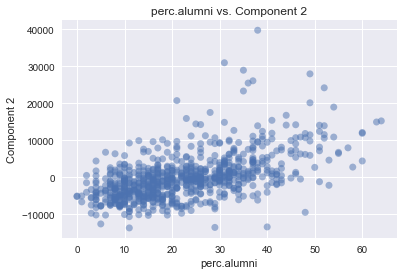

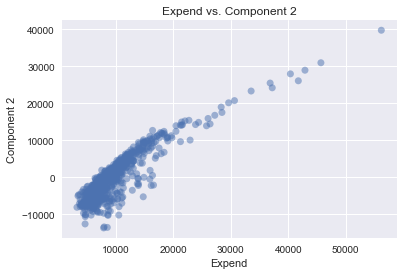

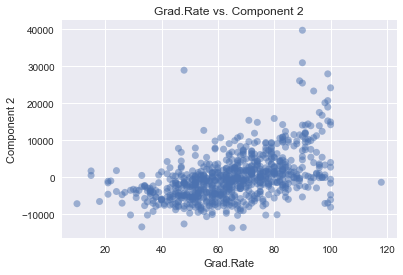

In [436]:
for i in range(colleges.shape[1]):
    plt.figure()
    plt.scatter(y = projected[:, 1], x = colleges[:,i], \
            edgecolor='none', alpha=0.5) #cmap=plt.cm.get_cmap('nipy_spectral', 5 ))
    plt.xlabel(colleges_pd.columns[i])
    plt.ylabel('Component 2')
    plt.title(colleges_pd.columns[i] + ' vs. Component 2')
    
# Code borrowed from the Python Data Science Handbook

### Drawing a Biplot

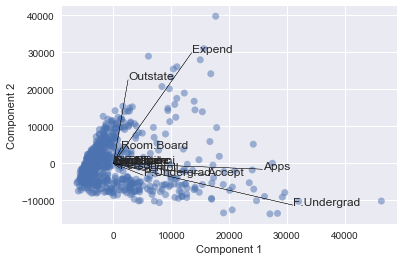

In [444]:
colleges_num = colleges_pd.values

pca = PCA(2) 
projected = pca.fit_transform(colleges_num)
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

maxs = max(pca.transform(colleges_num)[:,0])
maxys = max(pca.transform(colleges_num)[:,1])

# Plot arrows
varnum = 0
for i, j in pca.components_.transpose():  
    plt.text(i * maxs, j * maxys, colleges_pd.columns[varnum])
    plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
    varnum += 1

## 1. Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.

#### What variables appear strongly correlated on the first principal component?

Based on the series of scatterplots above, the most strongly correlated variables are:

   * the number of applications received (Apps);
   * the number of applications accepted (Accept);
   * the percentage of students who are full-time undergraduates (F.Undergrad);
   * the number of new students enrolled (Enroll).
     
However, when we review the biplot (above) we see that the number of applications and the number of full-time undergraduates appears to be more correlated than the number of enrollments or applications accepted. 

#### What about the second principal component?

Based on the series of scatterplots above, the most strongly correlated variables are:

   * the cost of out-of-state tuition (Outstate);
   * instructional expenditure per student (Expend).
     
Both of these values are clearly the most correlated, and this finding is confirmed by the biplot. 

#### Discussion

The first component identified by the PCA analysis may be approximating the "size" of the school. The number of applications received, students accepted, and enrollments are all indicators of new student interest and acquisition, while full-time enrollments are indicative of the year-to-year size of the school population. The number of full-time undergraduates being the most extreme value in the biplot's Component 1 axis reinforces this assertion. 

The second component may represent the financial resources of the institution. It is reasonable to assume that higher out-of-state tuition would be charged by better-resourced institutions, which would in turn spend more per-student. These institutions may be smaller and more research-focused - an assertion which can be confirmed based on the plot of Student-to-Faculty Ratio and Component 2 (S.F.Ratio vs Component 2). Here we see a negative trend, thus institutions which are higher in Component 2 appear to have more faculty per student.

## 2. Calculate the cumulative proportion of variance explained by all the principal components (see 10.2.3 in ISLR). 
### Approximately how much of the variance in College is explained by the first two principal components?

The first 2 variables explain 93.81 % of variance in College.


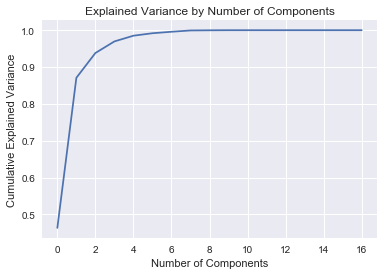

In [440]:
pca = PCA().fit(colleges_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
perc = round(np.sum(pca.explained_variance_ratio_[:3]),4) * 100
print(("The first 2 variables explain {} % of variance in College.").format(perc))
# Plotting code borrowed from The Python Data Science Handbook

# Clustering States

## PCA Analysis

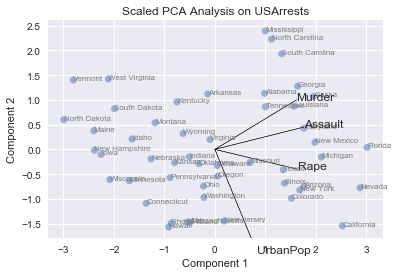

In [441]:
csv_link = "https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/unsupervised-learning/data/USArrests.csv"
crimes = pd.read_csv(csv_link)

# Code based on examples at: 
# - https://github.com/teddyroland/python-biplot/blob/master/biplot.py
# - https://github.com/UC-MACSS/persp-analysis/blob/master/labs/PCA_Lab_Perspectives.ipynb
cols = [i for i in crimes.columns if i not in ['State']]
#Select Columns (Variables) on which to run PCA
def crime_pca(crimes_num, title):
    pca = PCA(2)  
    projected = pca.fit_transform(crimes_num)
    plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)

    # Plot States
    statenum = 0
    for i, j in projected:
        plt.text(i, j, crimes.State[statenum], fontsize = 8, color = 'grey')
        statenum += 1

    maxs = max(pca.transform(crimes_num)[:,0])
    maxys = max(pca.transform(crimes_num)[:,1])

    # Plot arrows
    varnum = 1
    for i, j in pca.components_.transpose():  
        plt.text(i * maxs, j * maxys, crimes.columns[varnum])
        plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
        varnum += 1
    plt.show()
    return pca
    
pca = crime_pca(crimes_num = preprocessing.scale(crimes[cols]), title = 'Scaled PCA Analysis on USArrests')

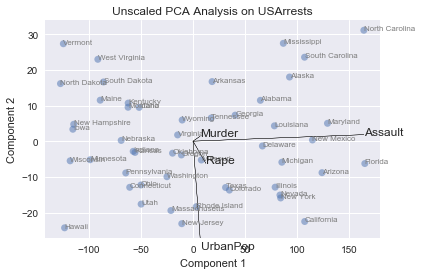

In [442]:
pca = crime_pca(crimes_num = crimes[cols], title = 'Unscaled PCA Analysis on USArrests')

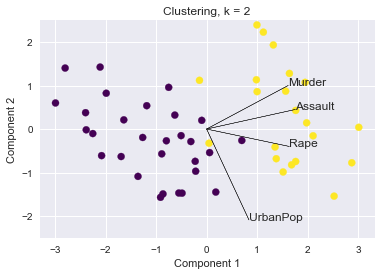

In [463]:
def k_means_crime(k):
    kmeans = KMeans(k)
    kmeans.fit(crimes[cols])
    y_true = crimes.State
    y_kmeans = kmeans.predict(crimes[cols])
    pca = PCA(2)
    projected = pca.fit_transform(crimes_num)

    plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Clustering, k = ' + str(k))
    plt.ylim(-2.5, 2.5)

    maxs = max(pca.transform(crimes_num)[:,0])
    maxys = max(pca.transform(crimes_num)[:,1])

    varnum = 1
    for i, j in pca.components_.transpose():  
        plt.text(i *maxs, j * maxys, crimes.columns[varnum])
        plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
        varnum += 1
k_means_crime(2)

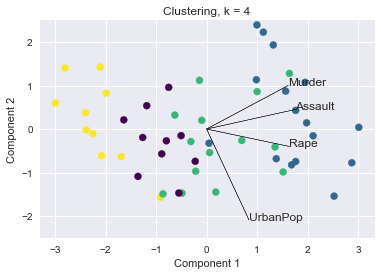

In [464]:
k_means_crime(4)

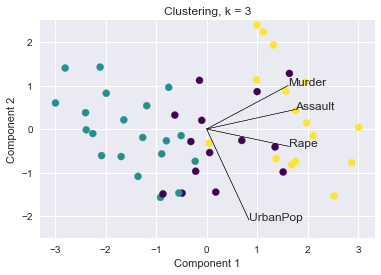

In [465]:
k_means_crime(3)

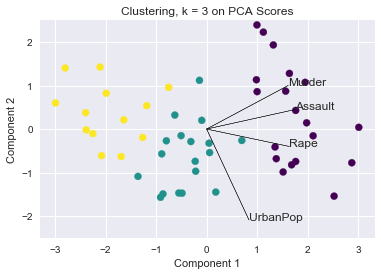

In [489]:
pca = PCA(2).fit(colleges_num)
kmeans = KMeans(3)
kmeans.fit(pca.fit_transform(crimes_num))
y_kmeans = kmeans.predict(pca.fit_transform(crimes_num))

projected = pca.fit_transform(crimes_num)

plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering, k = 3 on PCA Scores')
plt.ylim(-2.5, 2.5)

maxs = max(pca.transform(crimes_num)[:,0])
maxys = max(pca.transform(crimes_num)[:,1])

varnum = 1
for i, j in pca.components_.transpose():  
    plt.text(i *maxs, j * maxys, crimes.columns[varnum])
    plt.arrow(0, 0,i * maxs, j * maxys, color='black', width=0.005, head_width=0.0025)
    varnum += 1

Result is better
